In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [39]:
df_train = pd.read_csv('oldDataset/iot_device_train.csv')
df_test = pd.read_csv('oldDataset/iot_device_test.csv')
#print(df_test.head())


frames = [df_train, df_test]
df = pd.concat(frames)
#print(df.head())

In [40]:
df.isnull().sum()

ack                         0
ack_A                       0
ack_B                       0
bytes                       0
bytes_A                     0
                           ..
suffix_is_googleapis.com    0
suffix_is_net               0
suffix_is_org               0
suffix_is_unresolved        0
device_category             0
Length: 298, dtype: int64

In [41]:
df['device_category'].value_counts()

device_category
security_camera    200
TV                 200
smoke_detector     200
thermostat         200
watch              200
baby_monitor       200
motion_sensor      200
lights             200
socket             200
water_sensor       100
Name: count, dtype: int64

In [42]:
df.shape

(1900, 298)

In [43]:
X = df.drop(columns='device_category', axis=1)
Y = df['device_category']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
extra_tree = ExtraTreeClassifier(random_state=0)
cls = BaggingClassifier(extra_tree, random_state=0).fit(X_train, y_train)
predictions = cls.predict(X_test)
cls.score(X_test, y_test)

0.8463157894736842

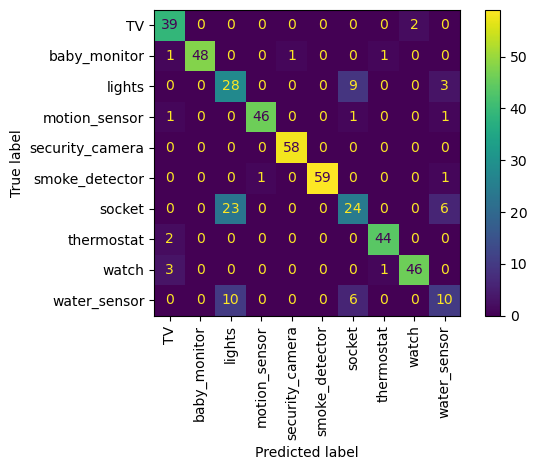

In [45]:
ConfusionMatrixDisplay.from_estimator(cls, X_test, y_test, display_labels=cls.classes_, xticks_rotation="vertical")
plt.tight_layout()
plt.show()

In [46]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
"""
precision_score(y_test, y_pred, average='micro') will return the total ratio of tp/(tp + fp)
"""
precision = precision_score(y_test, predictions, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions, average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.846316
Precision: 0.825966
Recall: 0.821235
F1 score: 0.819078


In [47]:
df.columns.tolist()

['ack',
 'ack_A',
 'ack_B',
 'bytes',
 'bytes_A',
 'bytes_A_B_ratio',
 'bytes_B',
 'ds_field_A',
 'ds_field_B',
 'duration',
 'http_GET',
 'http_POST',
 'http_bytes_avg',
 'http_bytes_entropy',
 'http_bytes_firstQ',
 'http_bytes_max',
 'http_bytes_median',
 'http_bytes_min',
 'http_bytes_stdev',
 'http_bytes_sum',
 'http_bytes_thirdQ',
 'http_bytes_var',
 'http_cookie_count',
 'http_cookie_values_avg',
 'http_cookie_values_entropy',
 'http_cookie_values_firstQ',
 'http_cookie_values_max',
 'http_cookie_values_median',
 'http_cookie_values_min',
 'http_cookie_values_stdev',
 'http_cookie_values_sum',
 'http_cookie_values_thirdQ',
 'http_cookie_values_var',
 'http_count_host',
 'http_count_req_content_type',
 'http_count_resp_code',
 'http_count_resp_content_type',
 'http_count_transactions',
 'http_count_user_agents',
 'http_dom_host_alexaRank',
 'http_dom_resp_code',
 'http_has_location',
 'http_has_referrer',
 'http_has_req_content_type',
 'http_has_resp_content_type',
 'http_has_user

In [48]:
#TODO make classifier dropping the columns that are not accesible from outside the network. Only the green ones
subset = df.loc[:, ['device_category',
                    'B_is_system_port',
                    'B_is_user_port',
                    'B_port_is_11095',
                    'B_port_is_1900', 
                    'B_port_is_5222',
                    'B_port_is_5223',
                    'B_port_is_5228',
                    'B_port_is_54975',
                    'B_port_is_80',
                    'B_port_is_8080',
                    'B_port_is_8280',
                    'B_port_is_9543',
                    'B_port_is_else',
                    'bytes',
                    'bytes_A',
                    'bytes_A_B_ratio',
                    'bytes_B',
                    'packets',
                    'packets_A',
                    'packets_A_B_ratio',
                    'packets_B']]
subset

,device_category,B_is_system_port,B_is_user_port,B_port_is_11095,B_port_is_1900,B_port_is_5222,B_port_is_5223,B_port_is_5228,B_port_is_54975,B_port_is_80,...,B_port_is_9543,B_port_is_else,bytes,bytes_A,bytes_A_B_ratio,bytes_B,packets,packets_A,packets_A_B_ratio,packets_B
0,security_camera,0,1,0,0,0,0,0,0,0,...,0,0,1213,743,0.713924,668,10,5,0.542604,5
1,security_camera,1,0,0,0,0,0,0,0,0,...,0,0,1213,743,1.806874,668,10,5,0.823481,5
2,security_camera,1,0,0,0,0,0,0,0,0,...,0,0,1213,743,0.103124,668,10,5,0.591825,5
3,security_camera,1,0,0,0,0,0,0,0,0,...,0,0,1213,743,1.806874,668,10,5,0.833287,5
4,security_camera,1,0,0,0,0,0,0,0,0,...,0,0,1213,743,1.806874,668,10,5,0.692254,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,watch,1,0,0,0,0,0,0,0,0,...,0,1,212053,202036,20.169310,10017,265,148,1.264946,117
896,watch,1,0,0,0,0,0,0,0,0,...,0,1,7749,5364,2.249056,2385,26,12,0.857082,14
897,watch,1,0,0,0,0,0,0,0,0,...,0,1,7091,5336,3.040454,1755,22,12,1.199880,10
898,watch,1,0,0,0,0,0,0,0,0,...,0,1,7882,5789,2.765885,2093,31,16,1.066596,15


In [49]:
sX = subset.drop(columns='device_category', axis=1)
sY = subset['device_category']

In [50]:
sX_train, sX_test, sy_train, sy_test = train_test_split(sX, sY, random_state=0)
extra_tree = ExtraTreeClassifier(random_state=0)
cls = BaggingClassifier(extra_tree, random_state=0).fit(sX_train, sy_train)
spredictions = cls.predict(sX_test)
cls.score(sX_test, sy_test)

0.6863157894736842

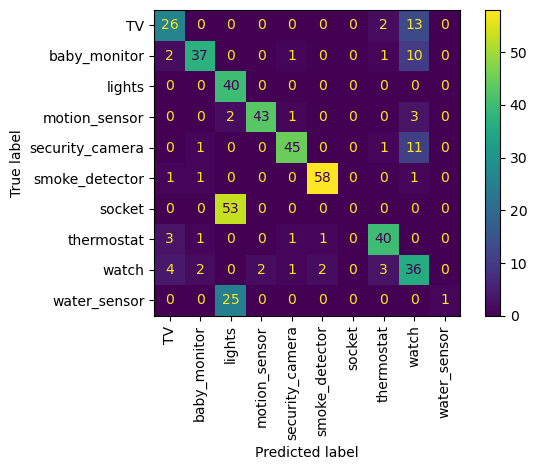

In [51]:
ConfusionMatrixDisplay.from_estimator(cls, sX_test, sy_test, display_labels=cls.classes_, xticks_rotation="vertical")
plt.tight_layout()
plt.show()

In [52]:
#TODO make classifier dropping the columns that are not accesible from outside the network. Orange without HTTP
subset2 = df.loc[:, ['device_category',
                    'B_is_system_port',
                    'B_is_user_port',
                    'B_port_is_11095',
                    'B_port_is_1900', 
                    'B_port_is_5222',
                    'B_port_is_5223',
                    'B_port_is_5228',
                    'B_port_is_54975',
                    'B_port_is_80',
                    'B_port_is_8080',
                    'B_port_is_8280',
                    'B_port_is_9543',
                    'B_port_is_else',
                    'bytes',
                    'bytes_A',
                    'bytes_A_B_ratio',
                    'bytes_B',
                    'packets',
                    'packets_A',
                    'packets_A_B_ratio',
                    'packets_B',
                    'packet_inter_arrivel_A_avg',
                    'packet_inter_arrivel_A_entropy',
                    'packet_inter_arrivel_A_firstQ',
                    'packet_inter_arrivel_A_max',
                    'packet_inter_arrivel_A_median',
                    'packet_inter_arrivel_A_min',
                    'packet_inter_arrivel_A_stdev',
                    'packet_inter_arrivel_A_sum',
                    'packet_inter_arrivel_A_thirdQ',
                    'packet_inter_arrivel_A_var',
                    'packet_inter_arrivel_B_avg',
                    'packet_inter_arrivel_B_entropy',
                    'packet_inter_arrivel_B_firstQ',
                    'packet_inter_arrivel_B_max',
                    'packet_inter_arrivel_B_median',
                    'packet_inter_arrivel_B_min',
                    'packet_inter_arrivel_B_stdev',
                    'packet_inter_arrivel_B_sum',
                    'packet_inter_arrivel_B_thirdQ',
                    'packet_inter_arrivel_B_var',
                    'packet_inter_arrivel_avg',
                    'packet_inter_arrivel_entropy',
                    'packet_inter_arrivel_firstQ',
                    'packet_inter_arrivel_max',
                    'packet_inter_arrivel_median',
                    'packet_inter_arrivel_min',
                    'packet_inter_arrivel_stdev',
                    'packet_inter_arrivel_sum',
                    'packet_inter_arrivel_thirdQ',
                    'packet_inter_arrivel_var',
                    'packet_size_A_avg',
                    'packet_size_A_entropy',
                    'packet_size_A_firstQ',
                    'packet_size_A_max',
                    'packet_size_A_median',
                    'packet_size_A_min',
                    'packet_size_A_stdev',
                    'packet_size_A_sum',
                    'packet_size_A_thirdQ',
                    'packet_size_A_var',
                    'packet_size_B_avg',
                    'packet_size_B_entropy',
                    'packet_size_B_firstQ',
                    'packet_size_B_max',
                    'packet_size_B_median',
                    'packet_size_B_min',
                    'packet_size_B_stdev',
                    'packet_size_B_sum',
                    'packet_size_B_thirdQ',
                    'packet_size_B_var',
                    'packet_size_avg',
                    'packet_size_entropy',
                    'packet_size_firstQ',
                    'packet_size_max',
                    'packet_size_median',
                    'packet_size_min',
                    'packet_size_stdev',
                    'packet_size_sum',
                    'packet_size_thirdQ',
                    'packet_size_var']]
subset2

,device_category,B_is_system_port,B_is_user_port,B_port_is_11095,B_port_is_1900,B_port_is_5222,B_port_is_5223,B_port_is_5228,B_port_is_54975,B_port_is_80,...,packet_size_avg,packet_size_entropy,packet_size_firstQ,packet_size_max,packet_size_median,packet_size_min,packet_size_stdev,packet_size_sum,packet_size_thirdQ,packet_size_var
0,security_camera,0,1,0,0,0,0,0,0,0,...,64.625000,1.061278,0.0,477,0.0,0,103.577739,679,60.50,10728.348010
1,security_camera,1,0,0,0,0,0,0,0,0,...,64.625000,1.061278,0.0,477,0.0,0,167.211532,679,60.50,27959.696429
2,security_camera,1,0,0,0,0,0,0,0,0,...,64.625000,1.061278,0.0,477,0.0,0,167.211532,679,60.50,27959.696429
3,security_camera,1,0,0,0,0,0,0,0,0,...,64.625000,1.061278,0.0,477,0.0,0,167.211532,679,60.50,27959.696429
4,security_camera,1,0,0,0,0,0,0,0,0,...,64.625000,1.061278,0.0,477,0.0,0,167.211532,679,60.50,27959.696429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,watch,1,0,0,0,0,0,0,0,0,...,734.094340,1.340238,0.0,1388,1388.0,0,685.183581,194535,1388.00,469476.540309
896,watch,1,0,0,0,0,0,0,0,0,...,230.269231,1.950945,0.0,1388,0.0,0,455.231858,5987,107.25,207236.044615
897,watch,1,0,0,0,0,0,0,0,0,...,255.863636,2.638807,0.0,1388,11.5,0,440.543636,5629,299.25,194078.694805
898,watch,1,0,0,0,0,0,0,0,0,...,185.806452,2.036823,0.0,1388,0.0,0,384.748006,5760,145.00,148031.027957


In [53]:
sX2 = subset2.drop(columns='device_category', axis=1)
sY2 = subset2['device_category']

In [54]:
sX_train2, sX_test2, sy_train2, sy_test2 = train_test_split(sX2, sY2, random_state=0)
extra_tree = ExtraTreeClassifier(random_state=0)
cls = BaggingClassifier(extra_tree, random_state=0).fit(sX_train2, sy_train2)
spredictions = cls.predict(sX_test2)
cls.score(sX_test2, sy_test2)

0.8084210526315789

In [55]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(sy_test2, spredictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
"""
precision_score(y_test, y_pred, average='micro') will return the total ratio of tp/(tp + fp)
"""
precision = precision_score(sy_test2, spredictions, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(sy_test2, spredictions, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(sy_test2, spredictions, average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.808421
Precision: 0.782590
Recall: 0.779754
F1 score: 0.777507


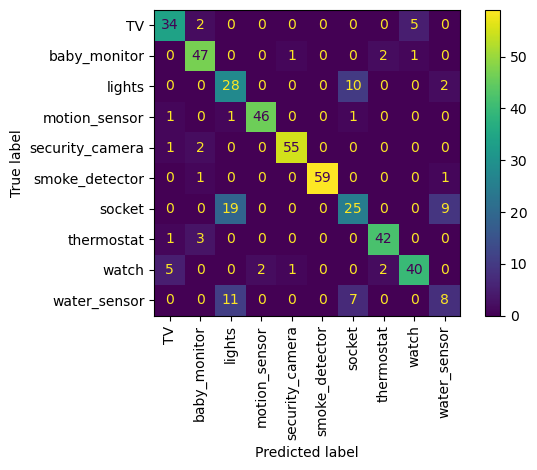

In [56]:
ConfusionMatrixDisplay.from_estimator(cls, sX_test2, sy_test2, display_labels=cls.classes_, xticks_rotation="vertical")
plt.tight_layout()
plt.show()